In [1]:
# importing standard Python Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# remove un-necessary warnings
import warnings
warnings.filterwarnings('ignore')

# loading the CSV file
df = pd.read_csv('CardioGoodFitness.csv')

# 1 Understanding the structure of the data


# 1.1 Observing the data

In [2]:
# taking a random sample
df.sample(6)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
89,TM498,23,Female,16,Single,3,3,45480,95
11,TM195,22,Female,14,Partnered,3,2,35247,66
106,TM498,25,Female,14,Single,2,2,45480,42
150,TM798,25,Male,16,Partnered,4,5,49801,120
36,TM195,26,Male,16,Partnered,2,2,53439,47
149,TM798,24,Male,16,Single,5,5,49801,160


In [3]:
#Shape and column list
print(f"The shape of the dataframe is: {df.shape}")
print(f"The columns of the dataframe are: {list(df.columns)}")

The shape of the dataframe is: (180, 9)
The columns of the dataframe are: ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']


In [4]:
#check if any feature has missing values
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Key observation:
- No column has any missing value

# 1.2 Understanding the feature types
 - Observe feature types (numerical vs categorcical)

In [5]:
# check the data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


 ###  Notes from df.info()
 - Most of the variables are numeric
 - ['Product', 'Gender', 'MaritalStatus'] are categorical
 - Let's explore features ['Usage', 'Finess']  more in details
     - what unique values do they take (too many or few ?)
 

In [6]:
# checking unique values of Usage and its value_counts
print(f"The number of unique values of Usage: {df.Usage.nunique()}. Unique values are: {df.Usage.unique()}")
df.Usage.value_counts()

The number of unique values of Usage: 6. Unique values are: [3 2 4 5 6 7]


3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [7]:
# checking unique values of Fitness and its value_counts
print(f"The number of unique values of Fitness: {df.Fitness.nunique()}. Unique values are: {df.Fitness.unique()}")
df.Fitness.value_counts()

The number of unique values of Fitness: 5. Unique values are: [4 3 2 1 5]


3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

 ### Note from value_counts()
 - Clearly, both Usage and Fitness take only few values
 - let's leave them as numeric in the context

# 1.3  Running the descriptive Statistics
 - to analyze 5 pt summary of numerical columns
 - to find out Top frequency items for categorical variables

In [8]:
# Describing columns of the dataframe
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


# Conclusion about Customers and Products from descriptive statistics

- Male, Partnered and Product TM195 dominate the sample
- 50 % (between First and Third Quartile) of the Customers fall into 24 to 33 years of age
- 50% (between First and Third Quartile) of the Customers have Fitness rating of 3 or 4
- 50% (between First and Third Quartile) of the Customers Usage are 3 or 4 times

Looking at Mean, Median, Min, Max, Standard deviation
- Age, Income, Miles are right skewed, while Education is left skewed
- Max observation 360 seems to be a Outlier in Miles
- A rather high std. deviation of 51.86 for Miles indicates there is high variation between customers


# 2 Univariate Data Analysis
 - Checking the frequency using histogram and spread using kernel density curve
 - countplot for categorical variables

## 2.1 Histogram for numerical variables

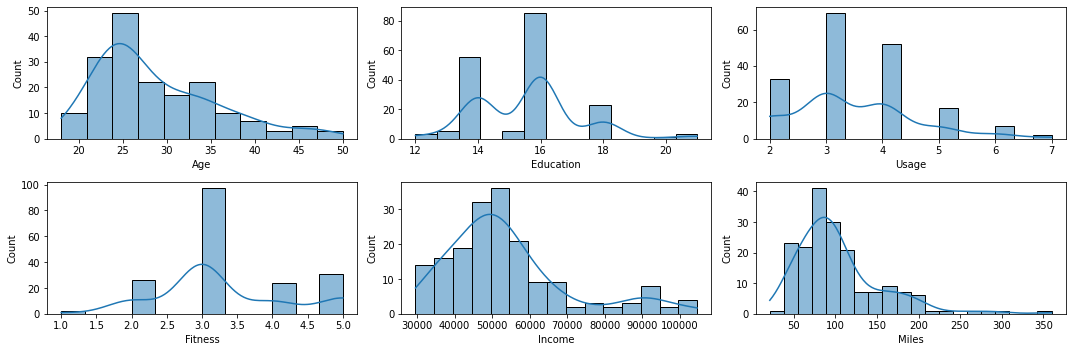

In [9]:
# getting the list of numeric columns
numeric_only = df.select_dtypes(include=np.number).columns.tolist()
# setting the number of columns and rows of figure
ncols = 3; nrows = 2

# setting figure size and axes
fig, ax = plt.subplots(ncols = ncols, nrows =nrows, figsize = (15,5))


# plotting seaborn histplot and fitting them in the axes as set above
for ind, x in enumerate(numeric_only):
    if ind < ncols:
        i = 0; j = ind
        sns.histplot(x = x, data = df, kde = True, ax = ax[i,j] )
    else:
        i = 1; j = ind%ncols
        sns.histplot(x = x, data = df, kde = True, ax = ax[i,j] )
        
plt.tight_layout()
plt.show()



 - For this dataset, most of the customers age is concentrated in the range of 24 - 33 years
 - Most of the customers have 14 or 16 yrs of Education. Education seem to have several peaks though
 - For Income, most of the data is concentrated between 30,000 to 70,000 range
 - A Fitness rating of 3 is most, and also most of the ratings in the data are  3 or 4
 - Usage of 3 is most, and also most of the Usage in the data are  3 or 4 times
 

## 2.2 Boxplot for univarate numerical variables

### Lets explore Fitness, Usage and Education of Customers more in detail with Boxplot

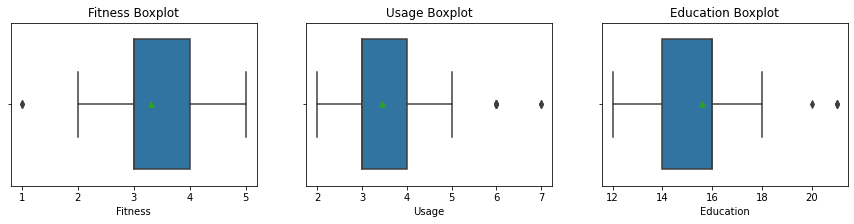

In [10]:
# setting the figure size and axes
fig, ax = plt.subplots(1,3, figsize = (15,3))
# fitting the boxplot to the axes and also showing Mean
sns.boxplot(x = 'Fitness', data = df, showmeans = True, ax = ax[0]).set(title = 'Fitness Boxplot')
sns.boxplot(x = 'Usage', data = df, showmeans = True, ax = ax[1]).set(title = 'Usage Boxplot')
sns.boxplot(x = 'Education', data = df, showmeans = True, ax = ax[2]).set(title = 'Education Boxplot')
plt.show()

 - Typical customers have 14-16 yrs of Education, 3-4 rating of Fitness
 - A rating of Fitness 1 seems to be an outlier in the dataset
 - Similarly Usage of 6 and 7 times also seem to be outliers
 - Education of 20 yrs or more can also be considered as outliers

## 2.3 Typical Customer and Product

 - leveraging Countplot for univariate categorical varibles 

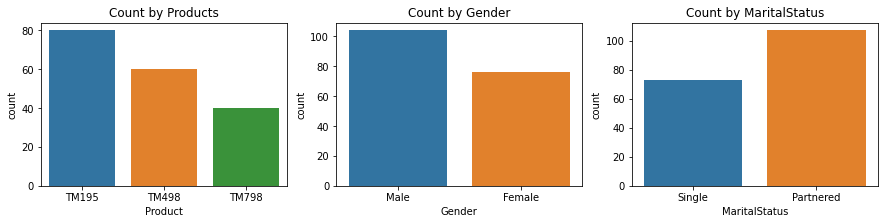

In [11]:
# setting the figure size and axes
fig, ax = plt.subplots(1,3, figsize = (15,3))
# counting by categorical variable using seaborn countplot
sns.countplot(x = 'Product', data = df, ax = ax[0]).set(title = 'Count by Products')
sns.countplot(x = 'Gender', data = df, ax = ax[1]).set(title = 'Count by Gender')
sns.countplot(x = 'MaritalStatus', data = df, ax = ax[2]).set(title = 'Count by MaritalStatus')
plt.show()

From the countplots, we can observe
- TM195 is the most bought product
- TM798 is least bought product
- Male dominate as customers
- Partnered couple dominate as customers

# 3 Multivariate analysis

## 3.1 Pairplot and correlation matrix for analyzing numerical columns
- Pair plot to quickly relationship pattern between any two numerical variables,
- correlation matrix to find correlation between two numerical variables

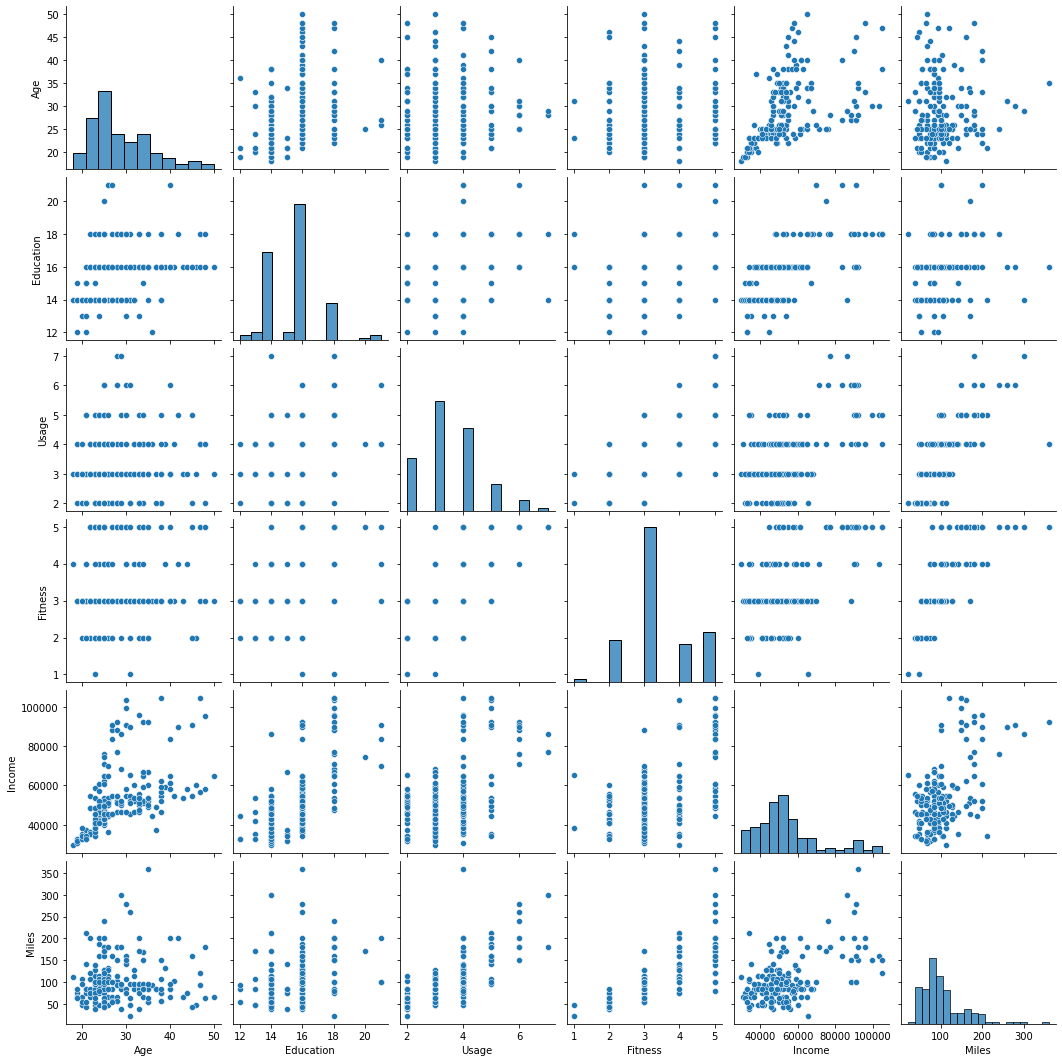

In [12]:
# draeing pairplot
sns.pairplot(df)

In [13]:
# correlation matrix
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


### Observation from pairplot and correlation matrix

 - Age seem to be somewhat positively corelated with Income
 - Usage & Fitness seem to be highly correlated with Miles 
 - Income is also somewhat positively corelated with Miles

 

### Let's check whether there is difference between Male and Female on Miles
(assuming Miles is an indicator or Product Experience)
 - utiliizing jointplot with hue = 'Gender'

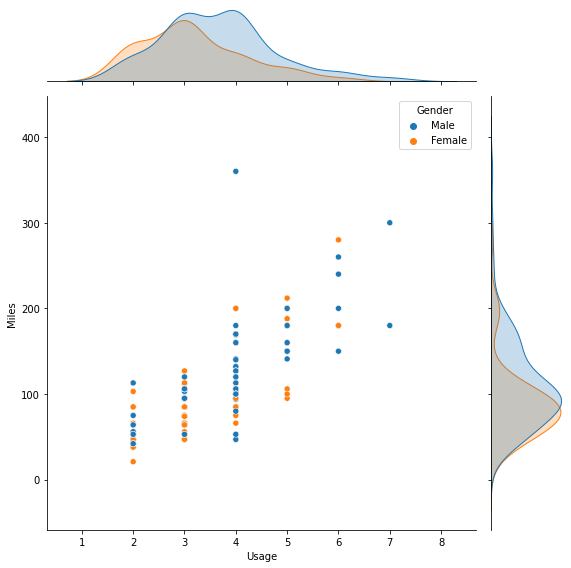

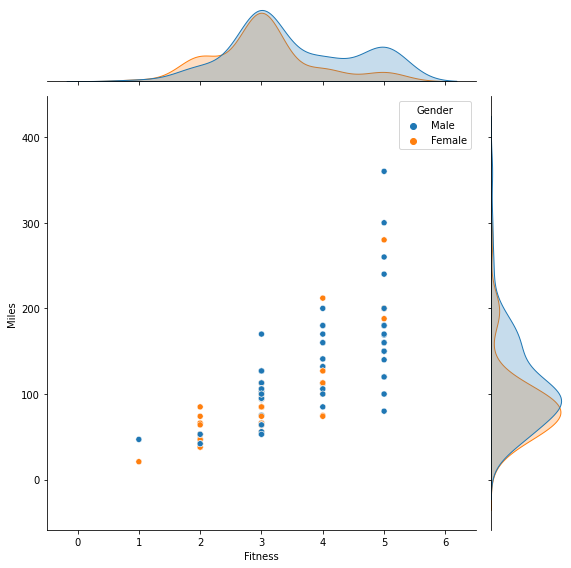

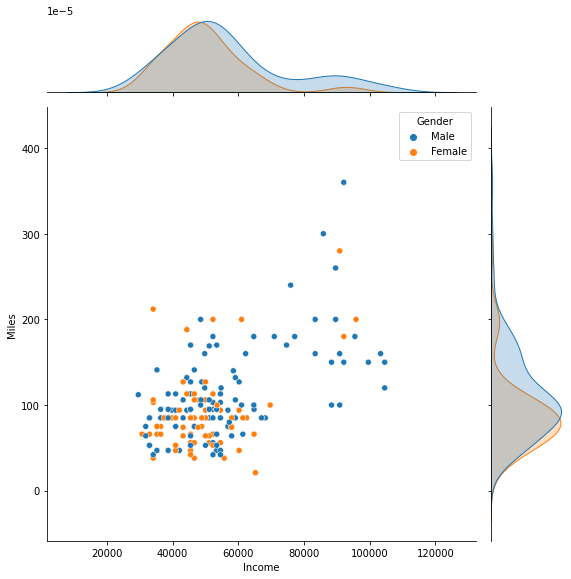

In [14]:
# utilizing kind = scatter for scatter plot and grouping by Gender (hue = Gender)
sns.jointplot(x = 'Usage', y = 'Miles',  data = df, kind = 'scatter', hue = 'Gender',height = 8, ratio = 5)
sns.jointplot(x = 'Fitness', y = 'Miles',  data = df, kind = 'scatter', hue = 'Gender', height = 8, ratio = 5 )
sns.jointplot(x = 'Income', y = 'Miles',  data = df, kind = 'scatter', hue = 'Gender', height = 8, ratio = 5)
plt.show()

 - As obseved from the plots above, there is no significant diifference between Male and Female on Miles

### 3.2 Analysis of 2 or more variables (both numerical and categorical)

### Creating Product and Customer profile

- Overall generate customer and product profile by grouping by all categorical variables ['Product', 'Gender', 'MaritalStatus'] and taking median values of key columns

In [15]:
# obtaining median values of columns grouoped by  ['Product', 'Gender', 'MaritalStatus']
df.groupby(['Product', 'Gender', 'MaritalStatus'])['Age','Income','Miles','Fitness', 'Usage'].median()

Age   Income  Miles  Fitness  Usage
Product Gender MaritalStatus                                      
TM195   Female Partnered      27.0  46617.0   66.0      3.0    3.0
               Single         26.0  45480.0   75.0      3.0    3.0
        Male   Partnered      30.0  51165.0   75.0      3.0    3.0
               Single         25.0  43206.0   94.0      3.0    3.0
TM498   Female Partnered      31.0  50028.0   85.0      3.0    3.0
               Single         25.5  47185.5   79.5      3.0    3.0
        Male   Partnered      31.0  52302.0   95.0      3.0    3.0
               Single         25.0  47185.5   95.0      3.0    3.0
TM798   Female Partnered      29.0  91508.5  200.0      5.0    5.5
               Single         24.0  53536.0  100.0      4.0    5.0
        Male   Partnered      27.0  83416.0  160.0      5.0    4.0
               Single         25.5  59761.0  150.0      5.0    4.5

## Key Insights about customer and Product profile from above group by function
 - Most of the customers of TM195 & TM498 have Fitness rating of 3, while most of TM798 customers have high Fitness rating of 5
 - Most of the customers of TM195 & TM498 use them 3 times, while TM798 is used by its customers 4 times mostly
 - Both for TM195 & TM498 Products, typically Male Partnered customers have higher income than partnered female or single male customers
 - For TM798 though, female partnered customers have higher income than male or single female customers
 - Also for TM798, female partnered customers have larger Miles than their single female or male counterparts, compared to other products

### Plotting the above observation using countplot and barplot with hues

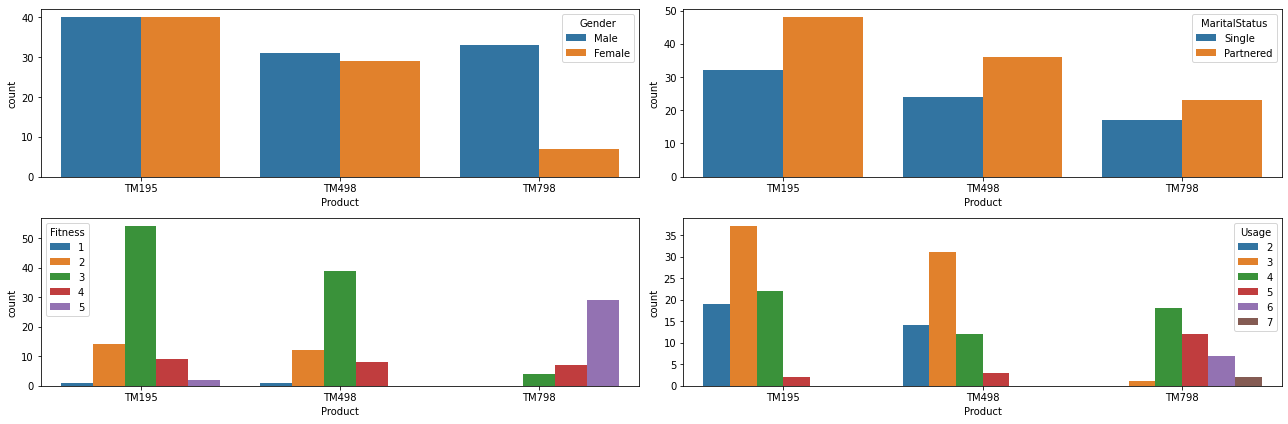

In [16]:
# setting the figure size and axes
fig, ax = plt.subplots(2,2, figsize = (18,6))
# countplot and grouping by gender, maritalstatus, Fitness, Usage
sns.countplot(x = 'Product', hue = 'Gender',  data = df, ax = ax[0,0])
sns.countplot(x = 'Product', hue = 'MaritalStatus',  data = df, ax = ax[0,1])
sns.countplot(x = 'Product', hue = 'Fitness',  data = df, ax = ax[1,0])
sns.countplot(x = 'Product', hue = 'Usage',  data = df, ax = ax[1,1])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Product', ylabel='Miles'>

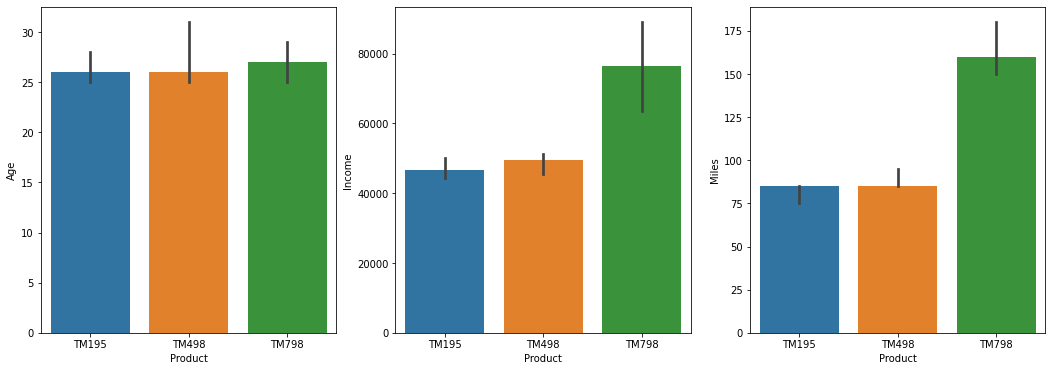

In [17]:
#setting the figure size and axes
fig, ax = plt.subplots(1,3, figsize = (18,6))
# using estimator as median (no mean!!)
sns.barplot(x = 'Product', y = 'Age' ,data = df ,estimator = np.median, ax = ax[0])
sns.barplot(x = 'Product', y = 'Income' ,estimator = np.median, data = df ,ax = ax[1])
sns.barplot(x = 'Product', y = 'Miles' ,estimator = np.median, data = df ,ax = ax[2])


## 3.3 Analyzing correlation and plotting relationship

<AxesSubplot:>

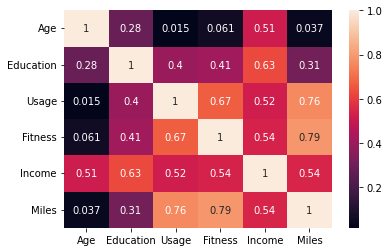

In [18]:
# heamapping correlation among numerical variables
sns.heatmap(df.corr(), annot= True)

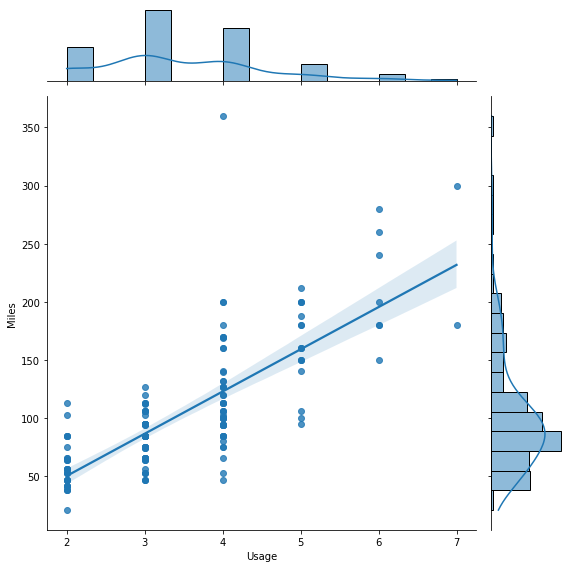

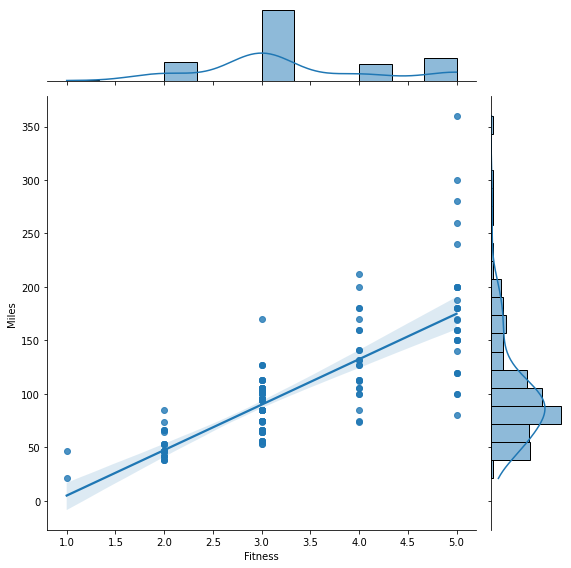

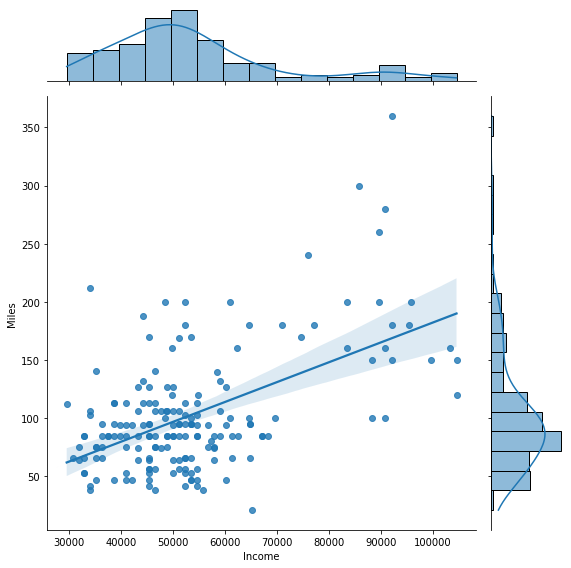

In [19]:
# a regression line using kind = 'reg'
# plotting the 3 highest relationship with Miles, assuming Miles as an indicator of the Product experience 
sns.jointplot(x = 'Usage', y = 'Miles',  data = df, kind = 'reg', height = 8, ratio = 5)
sns.jointplot(x = 'Fitness', y = 'Miles',  data = df, kind = 'reg',  height = 8, ratio = 5 )
sns.jointplot(x = 'Income', y = 'Miles',  data = df, kind = 'reg',  height = 8, ratio = 5)
plt.show()

# 4 Conclusion and Insights from the data
1. For this dataset, most of the customers age is concentrated in the range of 24 - 33 years
2. Most of the customers have 14 or 16 yrs of Education
3. TM195 is the most bought product, a kind of product for masses
4. TM798 is least bought product. However this is bought by high income customers, especially partnered female customers
5. Male dominate as customers overall
6. Also overall Partnered couple dominate as customers
7. Most of the customers of TM195 & TM498 have Fitness rating of 3, while most of TM798 customers have high Fitness rating of 5
8. Most of the customers of TM195 & TM498 use them 3 times, while TM798 is used by its customers 4 times mostly
9. Both for TM195 & TM498 Products, typically Male Partnered customers have higher income than partnered female or single male customers
10. For TM798 though, female partnered customers have higher income than male or single female customers
11. Also for TM798, female partnered customers have larger Miles than their single female or male counterparts, compared to other products

# 5 Recommendations to Cardio Good Fitness Retail store
1. Advertise treadmill products to lure young customers (late 20s to early 30s)
2. Spend the Marketing Money to target fitness concious customers [medium rating of 3 to high rating 5]
3. Overall strengthen the image & positioning of treadmill Products amongst Partnered couples
4. Position TM195 as mass treadmill product
    - For the Partnered customers in the income range of late 40s to early 50 K, position TM195 as desirable treadmill product
5. Position TM798 as high end treadmill product
    - Overall position TM798 to  high income (income range > 80 K) partnered customers, especially partnered female customers